In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob

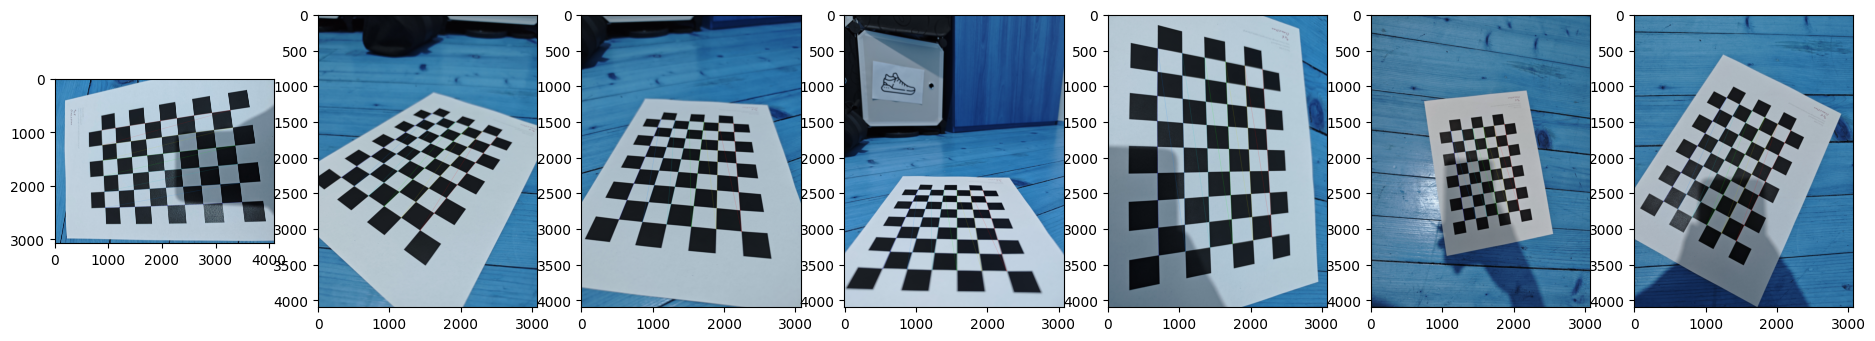

In [7]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
GRID_H = 9
GRID_W = 6

objp = np.zeros((GRID_H*GRID_W,3), np.float32)
objp[:,:2] = np.mgrid[0:GRID_H,0:GRID_W].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
 
images = glob.glob('calibration/*.jpg')

plt.figure(figsize=(30, 10))  # Set the figure size
i = 1
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (GRID_H,GRID_W), None)
 
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
 
        corners2 = cv2.cornerSubPix(gray,corners, (22,22), (-1,-1), criteria)
        imgpoints.append(corners2)
 
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (GRID_H,GRID_W), corners2, ret)

        plt.subplot(2, 9, i)
        plt.imshow(img)
        i += 1
        #cv.imshow('img', img)
        #cv.waitKey(500)
 
#cv.destroyAllWindows()
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


In [3]:
objpoints[0].shape, imgpoints[0].shape

((54, 3), (54, 1, 2))

In [4]:
len(objpoints), len(imgpoints)

(7, 7)

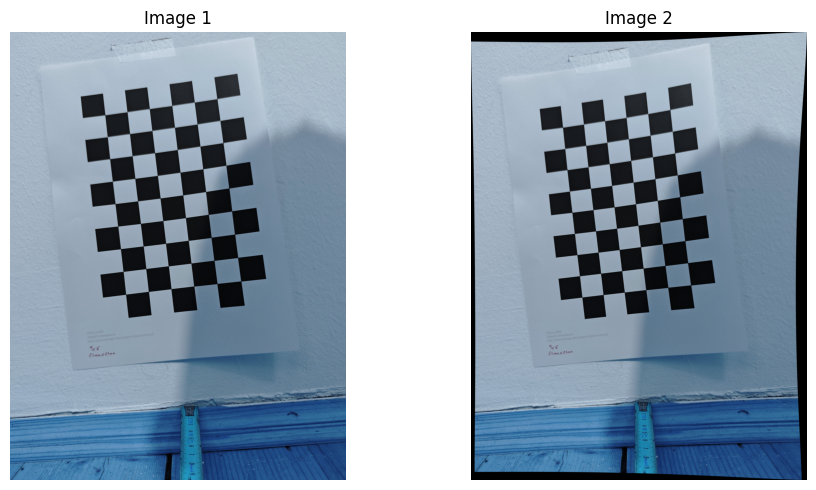

In [5]:
img = cv2.imread('distance/IMG_20241218_203031.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# Assuming 'img' and 'dst' are already defined (e.g., as NumPy arrays)
plt.figure(figsize=(10, 5))  # Set the figure size

# Display the first image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(img)
plt.title("Image 1")
plt.axis("off")  # Turn off the axis

# Display the second image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(dst)
plt.title("Image 2")
plt.axis("off")  # Turn off the axis

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [6]:
with open("cameraCal.npy", "wb") as f:
    # mtx, dist, rvecs, tvecs
    np.save(f, mtx)
    np.save(f, dist)
    np.save(f, rvecs)
    np.save(f, tvecs)